In [1]:
import pandas as pd
import os
from datetime import datetime, date 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Users/gwynethvolkmann/Desktop/datascience'
os.chdir(path)

In [3]:
dfno = pd.read_csv('car_no.csv')
dfno.head()

,carid,year,msrp,accelrate,mpg,C,L,M,MV,PT,SUV,TS
0,5,2001,25833.38,7.04,47.04,1,0,0,0,0,0,0
1,6,2001,19036.71,9.52,53.00,0,0,0,0,0,0,1
2,7,2002,19137.01,9.71,53.00,0,0,0,0,0,0,1
3,8,2003,38084.77,8.33,40.46,0,0,0,1,0,0,0
4,9,2003,19137.01,9.52,53.00,0,0,0,0,0,0,1


In [4]:
dfno.set_index('carid', inplace=True)
dfno.head()

,year,msrp,accelrate,mpg,C,L,M,MV,PT,SUV,TS
carid,,,,,,,,,,,
5,2001,25833.38,7.04,47.04,1,0,0,0,0,0,0
6,2001,19036.71,9.52,53.00,0,0,0,0,0,0,1
7,2002,19137.01,9.71,53.00,0,0,0,0,0,0,1
8,2003,38084.77,8.33,40.46,0,0,0,1,0,0,0
9,2003,19137.01,9.52,53.00,0,0,0,0,0,0,1


# Linear Regression Model 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [6]:
X = dfno.drop(["msrp"], axis=1)
y = dfno[["msrp"]]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [9]:
from sklearn.metrics import explained_variance_score,mean_absolute_error

lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [10]:
y_pred = model.predict(X_test)

In [11]:
explained_variance_score(y_test, y_pred)

0.4403518419542015

In [12]:
print('MAE: ', mean_absolute_error(y_test, y_pred))

MAE:  10747.375999532884


In [13]:
print(lm.coef_)

[[  -69.96344868  9636.81159617 -1487.1326771   -325.79477798
    907.33976429 -1890.13003593  2589.47718027   737.77151052
   1500.17882172 -1633.09888419]]


In [14]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)

           0            0
0       year   -69.963449
1  accelrate  9636.811596
2        mpg -1487.132677
3          C  -325.794778
4          L   907.339764
5          M -1890.130036
6         MV  2589.477180
7         PT   737.771511
8        SUV  1500.178822
9         TS -1633.098884


In [15]:
abs(lm.coef_), X.columns

(array([[  69.96344868, 9636.81159617, 1487.1326771 ,  325.79477798,
          907.33976429, 1890.13003593, 2589.47718027,  737.77151052,
         1500.17882172, 1633.09888419]]),
 Index(['year', 'accelrate', 'mpg', 'C', 'L', 'M', 'MV', 'PT', 'SUV', 'TS'], dtype='object'))

# Linear Regression Model 2 

In [16]:
X = dfno.drop(["msrp","year","C","PT","L"], axis=1)
y = dfno[["msrp"]]

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [19]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [20]:
y_pred = model.predict(X_test)
explained_variance_score(y_test, y_pred)

0.44855426063549264

In [21]:
print('MAE: ', mean_absolute_error(y_test, y_pred))

MAE:  10417.11281119983


In [22]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)

           0            0
0  accelrate  9821.901669
1        mpg -2249.162540
2          M -2433.209432
3         MV  2607.241332
4        SUV   688.162075
5         TS -1576.617373


# Random Forest Model 

In [23]:
dfrf = pd.read_csv('car_no.csv')
dfrf.head()

,carid,year,msrp,accelrate,mpg,C,L,M,MV,PT,SUV,TS
0,5,2001,25833.38,7.04,47.04,1,0,0,0,0,0,0
1,6,2001,19036.71,9.52,53.00,0,0,0,0,0,0,1
2,7,2002,19137.01,9.71,53.00,0,0,0,0,0,0,1
3,8,2003,38084.77,8.33,40.46,0,0,0,1,0,0,0
4,9,2003,19137.01,9.52,53.00,0,0,0,0,0,0,1


In [24]:
dfrf.set_index('carid', inplace=True)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() 

In [26]:
dfrf.head()

,year,msrp,accelrate,mpg,C,L,M,MV,PT,SUV,TS
carid,,,,,,,,,,,
5,2001,25833.38,7.04,47.04,1,0,0,0,0,0,0
6,2001,19036.71,9.52,53.00,0,0,0,0,0,0,1
7,2002,19137.01,9.71,53.00,0,0,0,0,0,0,1
8,2003,38084.77,8.33,40.46,0,0,0,1,0,0,0
9,2003,19137.01,9.52,53.00,0,0,0,0,0,0,1


In [27]:
y = dfrf['msrp']
X = dfrf.drop('msrp', axis = 1)

In [28]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=1)

In [29]:
rf.fit(X_train_rf, y_train_rf)
y_pred = rf.predict(X_test_rf)

In [30]:
from sklearn.metrics import mean_squared_error

print('MAE: ', mean_absolute_error(y_test_rf, y_pred))

MAE:  10273.21536875


In [31]:
explained_variance_score(y_test_rf, y_pred)

0.48496329031878527

<AxesSubplot:>

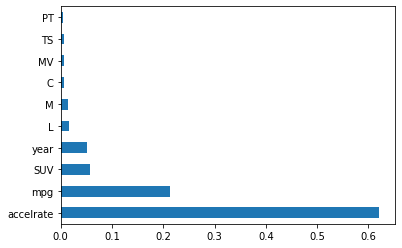

In [32]:
model = rf.fit(X_train_rf, y_train_rf)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# XGBoost Model

In [33]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from xgboost import plot_importance

In [34]:
y = dfno['msrp']
X = dfno.drop('msrp', axis = 1)

In [35]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [37]:
xgbr.fit(X_train_xg, y_train_xg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [38]:
score = xgbr.score(X_train_xg, y_train_xg)  
print("Training score: ", score)

Training score:  0.9999997788953645


In [39]:
scores = cross_val_score(xgbr, X_train_xg, y_train_xg,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.55


In [40]:
y_pred = xgbr.predict(X_test_xg)
mse = mean_squared_error(y_test_xg, y_pred)
print("Mean Squared Error: %.2f" % mse)

Mean Squared Error: 244512398.66


In [41]:
mean_absolute_error(y_test_xg, y_pred)

11372.45931640625

In [42]:
explained_variance_score(y_test_xg, y_pred)

0.4008022562269258

<AxesSubplot:>

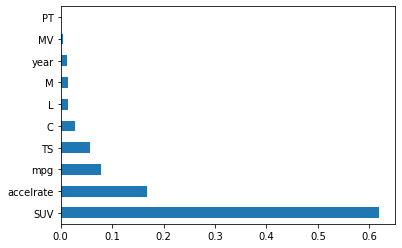

In [43]:
model = xgbr.fit(X_train_xg, y_train_xg)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')